## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9785856	total: 58.8ms	remaining: 58.7s
1:	learn: 0.9597595	total: 59.8ms	remaining: 29.8s
2:	learn: 0.9411286	total: 60.8ms	remaining: 20.2s
3:	learn: 0.9238604	total: 61.9ms	remaining: 15.4s
4:	learn: 0.9080591	total: 62.9ms	remaining: 12.5s
5:	learn: 0.8913823	total: 64.1ms	remaining: 10.6s
6:	learn: 0.8750413	total: 65ms	remaining: 9.22s
7:	learn: 0.8590289	total: 65.9ms	remaining: 8.17s
8:	learn: 0.8432728	total: 66.8ms	remaining: 7.35s
9:	learn: 0.8279611	total: 67.7ms	remaining: 6.7s
10:	learn: 0.8135336	total: 68.6ms	remaining: 6.17s
11:	learn: 0.7986661	total: 69.5ms	remaining: 5.72s
12:	learn: 0.7836734	total: 70.3ms	remaining: 5.34s
13:	learn: 0.7691342	total: 71.2ms	remaining: 5.02s
14:	learn: 0.7569343	total: 72.1ms	remaining: 4.73s
15:	learn: 0.7436359	total: 73ms	remaining: 4.49s
16:	learn: 0.7299306	total: 73.8ms	remaining: 4.27s
17:	learn: 0.7177047	total: 74.6ms	remaining: 4.07s
18:	learn: 0.7062172	total: 75.5ms	remaining: 3.9

60:	learn: 0.4203655	total: 108ms	remaining: 1.66s
61:	learn: 0.4163793	total: 109ms	remaining: 1.64s
62:	learn: 0.4137290	total: 110ms	remaining: 1.63s
63:	learn: 0.4086147	total: 111ms	remaining: 1.62s
64:	learn: 0.4052315	total: 111ms	remaining: 1.6s
65:	learn: 0.4011599	total: 112ms	remaining: 1.59s
66:	learn: 0.3977758	total: 113ms	remaining: 1.57s
67:	learn: 0.3949841	total: 114ms	remaining: 1.56s
68:	learn: 0.3919790	total: 115ms	remaining: 1.55s
69:	learn: 0.3895215	total: 116ms	remaining: 1.53s
70:	learn: 0.3870713	total: 116ms	remaining: 1.52s
71:	learn: 0.3844414	total: 117ms	remaining: 1.51s
72:	learn: 0.3817398	total: 118ms	remaining: 1.5s
73:	learn: 0.3782023	total: 119ms	remaining: 1.49s
74:	learn: 0.3745557	total: 120ms	remaining: 1.47s
75:	learn: 0.3721372	total: 120ms	remaining: 1.46s
76:	learn: 0.3683336	total: 121ms	remaining: 1.45s
77:	learn: 0.3661486	total: 122ms	remaining: 1.44s
78:	learn: 0.3641913	total: 123ms	remaining: 1.43s
79:	learn: 0.3616693	total: 124ms

161:	learn: 0.2442700	total: 192ms	remaining: 993ms
162:	learn: 0.2436985	total: 193ms	remaining: 990ms
163:	learn: 0.2429022	total: 194ms	remaining: 988ms
164:	learn: 0.2421448	total: 195ms	remaining: 985ms
165:	learn: 0.2413741	total: 196ms	remaining: 982ms
166:	learn: 0.2406704	total: 196ms	remaining: 979ms
167:	learn: 0.2398578	total: 197ms	remaining: 977ms
168:	learn: 0.2388479	total: 198ms	remaining: 974ms
169:	learn: 0.2381062	total: 199ms	remaining: 972ms
170:	learn: 0.2371502	total: 200ms	remaining: 969ms
171:	learn: 0.2367059	total: 201ms	remaining: 966ms
172:	learn: 0.2362415	total: 201ms	remaining: 963ms
173:	learn: 0.2357089	total: 202ms	remaining: 960ms
174:	learn: 0.2348874	total: 203ms	remaining: 957ms
175:	learn: 0.2341622	total: 204ms	remaining: 955ms
176:	learn: 0.2332014	total: 205ms	remaining: 952ms
177:	learn: 0.2325810	total: 206ms	remaining: 950ms
178:	learn: 0.2318892	total: 207ms	remaining: 947ms
179:	learn: 0.2310001	total: 207ms	remaining: 945ms
180:	learn: 

288:	learn: 0.1709690	total: 298ms	remaining: 733ms
289:	learn: 0.1705027	total: 299ms	remaining: 731ms
290:	learn: 0.1701300	total: 300ms	remaining: 730ms
291:	learn: 0.1699082	total: 300ms	remaining: 728ms
292:	learn: 0.1696924	total: 301ms	remaining: 727ms
293:	learn: 0.1692195	total: 302ms	remaining: 725ms
294:	learn: 0.1687950	total: 303ms	remaining: 724ms
295:	learn: 0.1685626	total: 304ms	remaining: 724ms
296:	learn: 0.1683571	total: 305ms	remaining: 723ms
297:	learn: 0.1682194	total: 306ms	remaining: 721ms
298:	learn: 0.1677683	total: 307ms	remaining: 720ms
299:	learn: 0.1673917	total: 308ms	remaining: 719ms
300:	learn: 0.1669087	total: 309ms	remaining: 717ms
301:	learn: 0.1664631	total: 310ms	remaining: 716ms
302:	learn: 0.1662281	total: 311ms	remaining: 715ms
303:	learn: 0.1657913	total: 312ms	remaining: 714ms
304:	learn: 0.1652528	total: 313ms	remaining: 712ms
305:	learn: 0.1647055	total: 314ms	remaining: 711ms
306:	learn: 0.1643604	total: 314ms	remaining: 710ms
307:	learn: 

385:	learn: 0.1373668	total: 382ms	remaining: 608ms
386:	learn: 0.1371026	total: 383ms	remaining: 607ms
387:	learn: 0.1368934	total: 384ms	remaining: 606ms
388:	learn: 0.1365787	total: 385ms	remaining: 605ms
389:	learn: 0.1360976	total: 386ms	remaining: 603ms
390:	learn: 0.1357429	total: 387ms	remaining: 602ms
391:	learn: 0.1353479	total: 387ms	remaining: 601ms
392:	learn: 0.1350847	total: 388ms	remaining: 599ms
393:	learn: 0.1348747	total: 389ms	remaining: 598ms
394:	learn: 0.1345539	total: 390ms	remaining: 597ms
395:	learn: 0.1342151	total: 391ms	remaining: 596ms
396:	learn: 0.1340683	total: 391ms	remaining: 595ms
397:	learn: 0.1336926	total: 392ms	remaining: 593ms
398:	learn: 0.1333201	total: 393ms	remaining: 592ms
399:	learn: 0.1331580	total: 394ms	remaining: 591ms
400:	learn: 0.1328583	total: 395ms	remaining: 589ms
401:	learn: 0.1326112	total: 395ms	remaining: 588ms
402:	learn: 0.1323927	total: 396ms	remaining: 587ms
403:	learn: 0.1320480	total: 397ms	remaining: 586ms
404:	learn: 

512:	learn: 0.1089783	total: 488ms	remaining: 463ms
513:	learn: 0.1088329	total: 489ms	remaining: 462ms
514:	learn: 0.1086477	total: 490ms	remaining: 461ms
515:	learn: 0.1084693	total: 490ms	remaining: 460ms
516:	learn: 0.1083120	total: 491ms	remaining: 459ms
517:	learn: 0.1081764	total: 492ms	remaining: 458ms
518:	learn: 0.1079318	total: 493ms	remaining: 457ms
519:	learn: 0.1076368	total: 494ms	remaining: 456ms
520:	learn: 0.1074966	total: 494ms	remaining: 455ms
521:	learn: 0.1073602	total: 495ms	remaining: 453ms
522:	learn: 0.1073439	total: 496ms	remaining: 452ms
523:	learn: 0.1071940	total: 497ms	remaining: 451ms
524:	learn: 0.1069702	total: 498ms	remaining: 450ms
525:	learn: 0.1068101	total: 498ms	remaining: 449ms
526:	learn: 0.1066454	total: 499ms	remaining: 448ms
527:	learn: 0.1066294	total: 500ms	remaining: 447ms
528:	learn: 0.1064302	total: 501ms	remaining: 446ms
529:	learn: 0.1062853	total: 502ms	remaining: 445ms
530:	learn: 0.1060941	total: 503ms	remaining: 444ms
531:	learn: 

615:	learn: 0.0938959	total: 573ms	remaining: 357ms
616:	learn: 0.0937436	total: 574ms	remaining: 356ms
617:	learn: 0.0935973	total: 575ms	remaining: 355ms
618:	learn: 0.0934708	total: 576ms	remaining: 354ms
619:	learn: 0.0932854	total: 577ms	remaining: 353ms
620:	learn: 0.0931077	total: 577ms	remaining: 352ms
621:	learn: 0.0928881	total: 578ms	remaining: 351ms
622:	learn: 0.0927294	total: 579ms	remaining: 350ms
623:	learn: 0.0926191	total: 580ms	remaining: 349ms
624:	learn: 0.0924658	total: 580ms	remaining: 348ms
625:	learn: 0.0922694	total: 581ms	remaining: 347ms
626:	learn: 0.0920784	total: 582ms	remaining: 346ms
627:	learn: 0.0918983	total: 583ms	remaining: 345ms
628:	learn: 0.0916906	total: 584ms	remaining: 344ms
629:	learn: 0.0915009	total: 584ms	remaining: 343ms
630:	learn: 0.0912940	total: 585ms	remaining: 342ms
631:	learn: 0.0910477	total: 586ms	remaining: 341ms
632:	learn: 0.0908978	total: 587ms	remaining: 340ms
633:	learn: 0.0906908	total: 588ms	remaining: 339ms
634:	learn: 

741:	learn: 0.0766677	total: 678ms	remaining: 236ms
742:	learn: 0.0765671	total: 679ms	remaining: 235ms
743:	learn: 0.0763567	total: 680ms	remaining: 234ms
744:	learn: 0.0762558	total: 681ms	remaining: 233ms
745:	learn: 0.0760819	total: 682ms	remaining: 232ms
746:	learn: 0.0758950	total: 682ms	remaining: 231ms
747:	learn: 0.0757504	total: 683ms	remaining: 230ms
748:	learn: 0.0757135	total: 684ms	remaining: 229ms
749:	learn: 0.0755582	total: 685ms	remaining: 228ms
750:	learn: 0.0754706	total: 686ms	remaining: 227ms
751:	learn: 0.0752854	total: 687ms	remaining: 226ms
752:	learn: 0.0751467	total: 687ms	remaining: 226ms
753:	learn: 0.0750332	total: 688ms	remaining: 225ms
754:	learn: 0.0750079	total: 690ms	remaining: 224ms
755:	learn: 0.0749138	total: 691ms	remaining: 223ms
756:	learn: 0.0748330	total: 691ms	remaining: 222ms
757:	learn: 0.0747624	total: 692ms	remaining: 221ms
758:	learn: 0.0746076	total: 693ms	remaining: 220ms
759:	learn: 0.0745617	total: 694ms	remaining: 219ms
760:	learn: 

845:	learn: 0.0660623	total: 763ms	remaining: 139ms
846:	learn: 0.0659865	total: 764ms	remaining: 138ms
847:	learn: 0.0659180	total: 765ms	remaining: 137ms
848:	learn: 0.0658098	total: 766ms	remaining: 136ms
849:	learn: 0.0656877	total: 767ms	remaining: 135ms
850:	learn: 0.0655950	total: 767ms	remaining: 134ms
851:	learn: 0.0655182	total: 768ms	remaining: 133ms
852:	learn: 0.0653765	total: 769ms	remaining: 133ms
853:	learn: 0.0653049	total: 770ms	remaining: 132ms
854:	learn: 0.0652007	total: 771ms	remaining: 131ms
855:	learn: 0.0651815	total: 772ms	remaining: 130ms
856:	learn: 0.0651247	total: 773ms	remaining: 129ms
857:	learn: 0.0649664	total: 773ms	remaining: 128ms
858:	learn: 0.0649251	total: 774ms	remaining: 127ms
859:	learn: 0.0648436	total: 775ms	remaining: 126ms
860:	learn: 0.0648128	total: 776ms	remaining: 125ms
861:	learn: 0.0646834	total: 777ms	remaining: 124ms
862:	learn: 0.0645620	total: 778ms	remaining: 123ms
863:	learn: 0.0645329	total: 778ms	remaining: 122ms
864:	learn: 

973:	learn: 0.0555906	total: 868ms	remaining: 23.2ms
974:	learn: 0.0554868	total: 869ms	remaining: 22.3ms
975:	learn: 0.0554390	total: 870ms	remaining: 21.4ms
976:	learn: 0.0553500	total: 871ms	remaining: 20.5ms
977:	learn: 0.0552603	total: 871ms	remaining: 19.6ms
978:	learn: 0.0551136	total: 872ms	remaining: 18.7ms
979:	learn: 0.0550021	total: 873ms	remaining: 17.8ms
980:	learn: 0.0549027	total: 874ms	remaining: 16.9ms
981:	learn: 0.0548387	total: 874ms	remaining: 16ms
982:	learn: 0.0547999	total: 875ms	remaining: 15.1ms
983:	learn: 0.0547641	total: 876ms	remaining: 14.2ms
984:	learn: 0.0547063	total: 877ms	remaining: 13.3ms
985:	learn: 0.0546975	total: 877ms	remaining: 12.5ms
986:	learn: 0.0545971	total: 878ms	remaining: 11.6ms
987:	learn: 0.0545118	total: 879ms	remaining: 10.7ms
988:	learn: 0.0544858	total: 880ms	remaining: 9.79ms
989:	learn: 0.0544368	total: 881ms	remaining: 8.9ms
990:	learn: 0.0543671	total: 882ms	remaining: 8.01ms
991:	learn: 0.0542721	total: 883ms	remaining: 7.1

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

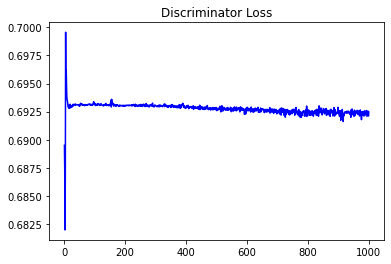

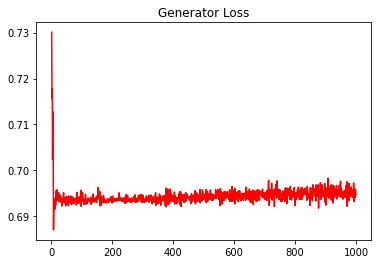

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08039902714397594


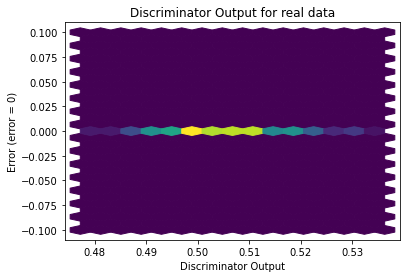

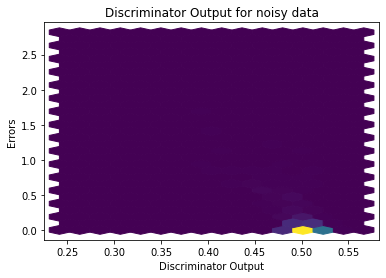

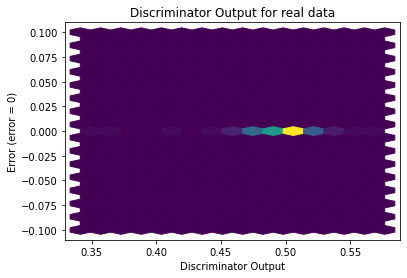

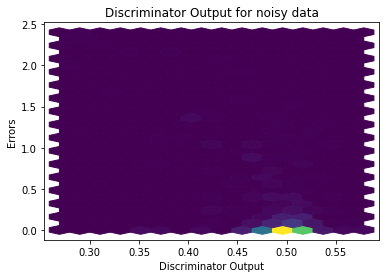

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


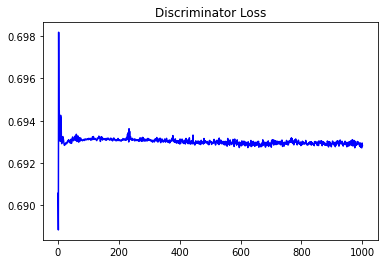

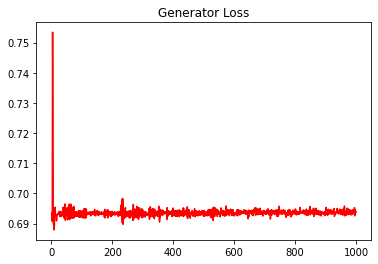

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08426913907973098


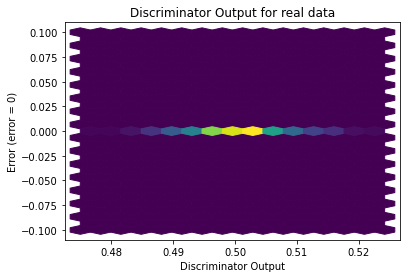

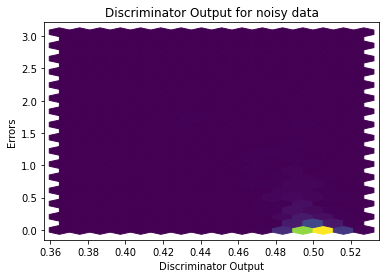

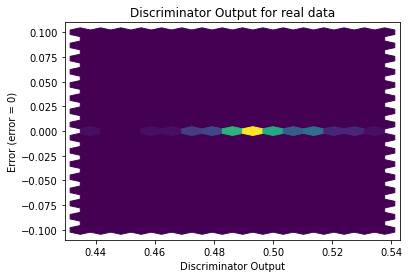

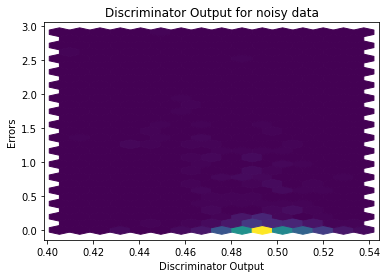

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.3832]], requires_grad=True)
